In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

FOLDER = '/home/genli/Coherent/'
Voltage = [1400, 1500, 1600, 1700, 1800, 1900]
Data_allPMT = []

#define a new data structure to store PMT_number and FittingParameter_dark and FittingParameter_light and gain and sigma_mu and err_sigma_mu
class PMT:
    def __init__(self, PMT_number, FittingParameter_dark, ErrFittingParameter_dark, FittingParameter_lighton, ErrFittingParameter_lighton, gain, sigma_mu, err_sigma_mu):
        self.PMT_number = PMT_number
        self.FittingParameter_dark = FittingParameter_dark
        self.ErrFittingParameter_dark = ErrFittingParameter_dark
        self.FittingParameter_lighton = FittingParameter_lighton
        self.ErrFittingParameter_lighton = ErrFittingParameter_lighton
        self.gain = gain
        self.sigma_mu = sigma_mu
        self.err_sigma_mu = err_sigma_mu



In [43]:
#for all the folders in the FOLDER, save the folder name
for folder in os.listdir(FOLDER):
    if os.path.isdir(FOLDER + folder):
        #create a new PMT object
        if folder.startswith("1"):
            #remove first two characters in the folder name
            PMT_number = np.int(folder[2:])
        FittingParameter_dark = []
        ErrFittingParameter_dark = []
        FittingParameter_lighton = []
        ErrFittingParameter_lighton = []
        flag = 0
        #for all the files in the folder, save the file name, and read the data from the file, which is popt in PMT*_dark.txt and PMT*_lighton.txt
        for file in os.listdir(FOLDER + folder):
            if file.endswith("dark.txt"):
                f = open(FOLDER + folder + '/' + file, 'r')
                popt_pmt = []
                pcov_pmt = []
                lines = f.readlines()
                for line in lines:
                    if line.startswith("popt"):
                        popt = []
                        # popt=[293.801944    32.66076269   5.96203275]
                        popt = line.split('=')[1].split('[')[1].split(']')[0].split()
                        for i in range(len(popt)):
                            popt[i] = float(popt[i])
                        popt_pmt.append(popt)
                    if line.startswith("pcov"):
                        pcov = []
                        pcov1 = []
                        pcov2 = []
                        pcov3 = []
                        # pcov=[[ 3.62646803e+02 -1.92045881e+00 -8.91405274e+00]
                        # [-1.92045881e+00  3.81828636e-01  9.36224298e-02]
                        # [-8.91405274e+00  9.36224298e-02  5.09159800e-01]]
                        pcov1 = line.split('=')[1].split('[[')[1].split(']')[0].split()
                        pcov2 = lines[lines.index(line)+1].split('[')[1].split(']')[0].split()
                        pcov3 = lines[lines.index(line)+2].split('[')[1].split(']')[0].split()
                        pcov.append(pcov1)
                        pcov.append(pcov2)
                        pcov.append(pcov3)
                        for i in range(len(pcov)):
                            for j in range(len(pcov[i])):
                                pcov[i][j] = float(pcov[i][j])
                        pcov_pmt.append(pcov)
                #if PMT number is 1117, remove the first element in the list
                if PMT_number == 17:
                    popt_pmt.pop(0)
                    pcov_pmt.pop(0)
                f.close()
                FittingParameter_dark = popt_pmt
                ErrFittingParameter_dark = pcov_pmt
                
            
            if file.endswith("lighton.txt"):
                f = open(FOLDER + folder + '/' + file, 'r')
                popt_pmt = []
                pcov_pmt = []
                lines = f.readlines()
                for line in lines:
                    if line.startswith("popt"):
                        popt = []
                        #popt=[293.801944    32.66076269   5.96203275]
                        popt = line.split('=')[1].split('[')[1].split(']')[0].split()
                        for i in range(len(popt)):
                            popt[i] = float(popt[i])
                        popt_pmt.append(popt)
            
                    if line.startswith("pcov"):
                        pcov = []
                        pcov1 = []
                        pcov2 = []
                        pcov3 = []
                        #pcov=[[ 3.62646803e+02 -1.92045881e+00 -8.91405274e+00]
                        #[-1.92045881e+00  3.81828636e-01  9.36224298e-02]
                        #[-8.91405274e+00  9.36224298e-02  5.09159800e-01]]
                        pcov1 = line.split('=')[1].split('[[')[1].split(']')[0].split()
                        pcov2 = lines[lines.index(line)+1].split('[')[1].split(']')[0].split()
                        pcov3 = lines[lines.index(line)+2].split('[')[1].split(']]')[0].split()
                        pcov.append(pcov1)
                        pcov.append(pcov2)
                        pcov.append(pcov3)
                        for i in range(len(pcov)):
                            for j in range(len(pcov[i])):
                                pcov[i][j] = float(pcov[i][j])
                        pcov_pmt.append(pcov)
                #if PMT number is 1117, remove the first element in the list
                if PMT_number == 17:
                    popt_pmt.pop(0)
                    pcov_pmt.pop(0)
                f.close()
                FittingParameter_lighton = popt_pmt
                ErrFittingParameter_lighton = pcov_pmt
                
        #create a new PMT object and save the PMT_number, FittingParameter_dark and FittingParameter_lighton
        if FittingParameter_dark and FittingParameter_lighton:
            gain = []
            sigma_mu = []
            err_sigma_mu = []
            for i in range(len(FittingParameter_dark)):
                gain.append(FittingParameter_dark[i][1]*243695.3808)
                sigma_mu.append(FittingParameter_dark[i][2]/FittingParameter_dark[i][1])
                err_sigma_mu.append(np.sqrt((np.sqrt(ErrFittingParameter_dark[i][2][2])/FittingParameter_dark[i][1])**2 + (FittingParameter_dark[i][2]*np.sqrt(ErrFittingParameter_dark[i][1][1])/FittingParameter_dark[i][1]**2)**2))
                
            PMT_new = PMT(PMT_number, FittingParameter_dark, ErrFittingParameter_dark, FittingParameter_lighton, ErrFittingParameter_lighton, gain, sigma_mu, err_sigma_mu)
            Data_allPMT.append(PMT_new)
        
                
#order the PMT object by PMT_number
Data_allPMT.sort(key=lambda x: x.PMT_number)

#print the PMT_number, FittingParameter_dark, FittingParameter_lighton, gain, sigma_mu, err_sigma_mu
for i in range(len(Data_allPMT)):
    print('PMT_number:', Data_allPMT[i].PMT_number)
    print('FittingParameter_dark:', Data_allPMT[i].FittingParameter_dark)
    print('ErrFittingParameter_dark:', Data_allPMT[i].ErrFittingParameter_dark)
    print('FittingParameter_lighton:', Data_allPMT[i].FittingParameter_lighton)
    print('ErrFittingParameter_lighton:', Data_allPMT[i].ErrFittingParameter_lighton)
    print('gain:', Data_allPMT[i].gain)
    print('sigma_mu:', Data_allPMT[i].sigma_mu)
    print('err_sigma_mu:', Data_allPMT[i].err_sigma_mu)
    print('\n')


[20278.63647073, 228.32267023, 57.74434905]

[[252650.885, 272.669122, -676.585161],
 [272.669122, 0.340161219, -0.737016242],
 [-676.585161, -0.737016242, 1.8524264]]

[53.61212228, 165.22284065, 17.93343429]

[[29.3985777, 0.0220226525, -6.62273578],
 [0.0220226525, 4.37699024, -0.0170483525],
 [-6.62273578, -0.0170483525, 4.43961208]]

PMT_number: 7
FittingParameter_dark: [[293.801944, 32.66076269, 5.96203275], [1146.44010004, 40.31217761, 9.89752931], [882.11754524, 63.78137522, 13.25476639], [752.34160717, 99.53883788, 19.79095726], [569.62179075, 145.87296243, 26.64890891], [454.15610756, 217.24300587, 35.98257646]]
ErrFittingParameter_dark: [[[323.849929, 7.87906922, -6.76012759], [7.87906922, 0.287905832, -0.198081843], [-6.76012759, -0.198081843, 0.199784622]], [[3527.34795, -1.27766303, -18.9706102], [-1.27766303, 0.374138006, 0.0188084601], [-18.9706102, 0.0188084601, 0.334309304]], [[6057.32814, 1.21563938, -62.8066402], [1.21563938, 1.81877475, -0.0442832263], [-62.8066402, -0.0442832263, 1.90567256]], [[3978.99031, 2.47727747, -73.916424], [2.47727747, 3.67085242, -0.163552038], [-73.916424, -0.163552038, 3.96153898]], [[1484.4779, 2.525624, -50.5524892], [2.525624, 4.3627415, -0.311016228], [-50.5524892, -0.311016228, 4.88587731]], [[365.863691, 1.60948802, -22.4358848], [1.60948802, 3.13893237, -0.362041

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'Voltage (V)')

Text(0, 0.5, 'Gain ($10^8$)')

Text(0.5, 1.0, 'Gain vs Voltage')

(array([1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08,  1.4e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

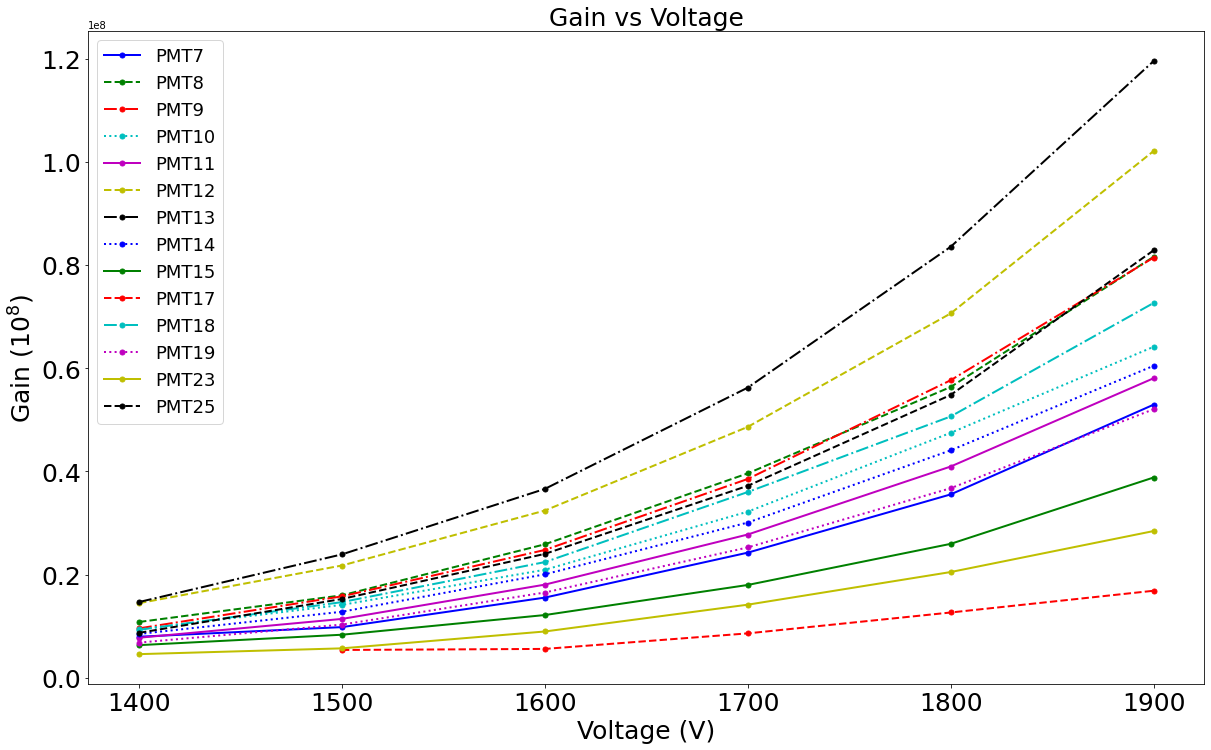

In [44]:
#plot the gain
gain = []
PMT_number = []
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
line_list = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
for i in range(len(Data_allPMT)):
    gain.append(Data_allPMT[i].gain)
    PMT_number.append(Data_allPMT[i].PMT_number)
plt.figure(figsize=(20,12))
for i in range(len(gain)):
    if PMT_number[i] == 17:
        plt.plot(Voltage[1:], gain[i], label='PMT'+str(PMT_number[i]), color=color_list[i], linestyle=line_list[i], marker='o', markersize=5, linewidth=2)
    else:
        plt.plot(Voltage, gain[i], label='PMT'+str(PMT_number[i]), color=color_list[i], linestyle=line_list[i], marker='o', markersize=5, linewidth=2)
plt.xlabel('Voltage (V)', fontsize=25)
plt.ylabel('Gain ($10^8$)', fontsize=25)
plt.title('Gain vs Voltage', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=18)
plt.show()


<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'Voltage (V)')

Text(0, 0.5, 'Gain ')

Text(0.5, 1.0, 'Gain vs Voltage')

(array([1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08,  1.4e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

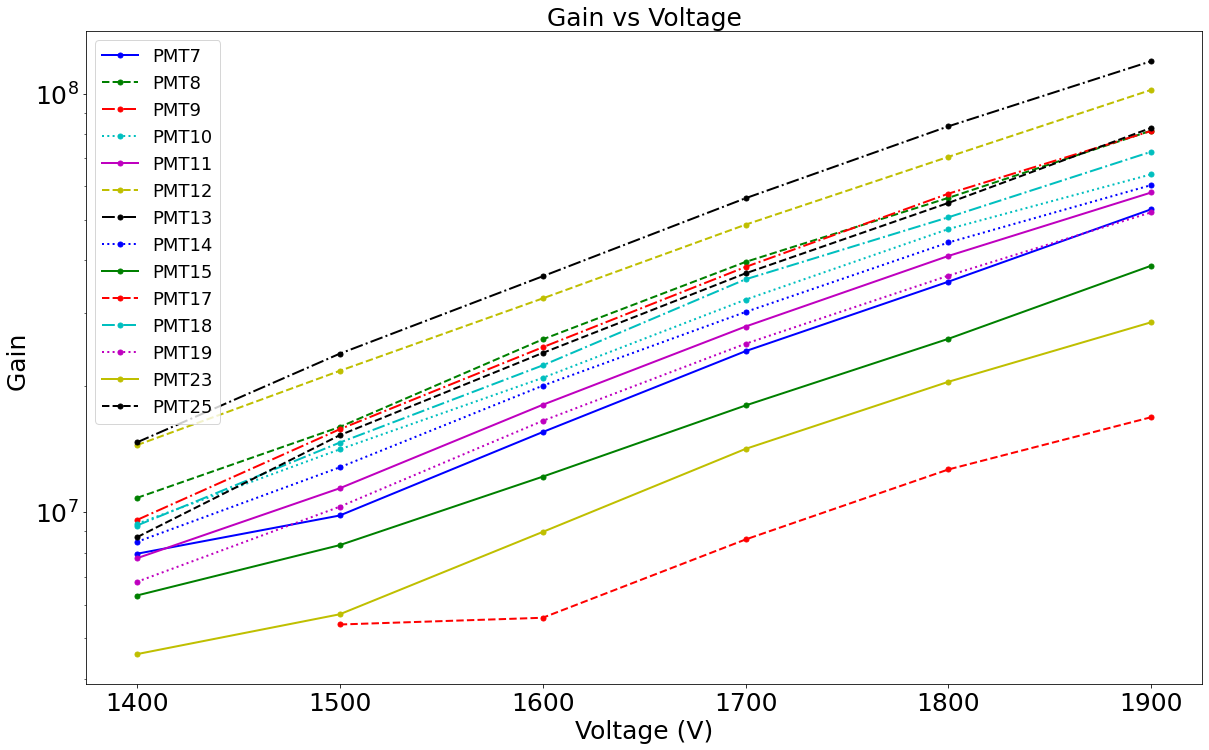

In [45]:
#log scale plot the gain
plt.figure(figsize=(20,12))
for i in range(len(gain)):
    if PMT_number[i] == 17:
        plt.plot(Voltage[1:], gain[i], label='PMT'+str(PMT_number[i]), color=color_list[i], linestyle=line_list[i], marker='o', markersize=5, linewidth=2)
    else:
        plt.plot(Voltage, gain[i], label='PMT'+str(PMT_number[i]), color=color_list[i], linestyle=line_list[i], marker='o', markersize=5, linewidth=2)
plt.xlabel('Voltage (V)', fontsize=25)
plt.ylabel('Gain ', fontsize=25)
plt.title('Gain vs Voltage', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=18)
plt.yscale('log')
plt.show()

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'Voltage (V)')

Text(0, 0.5, 'Gain ($10^8$)')

Text(0.5, 1.0, 'Gain vs Voltage')

(array([1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08,  1.4e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

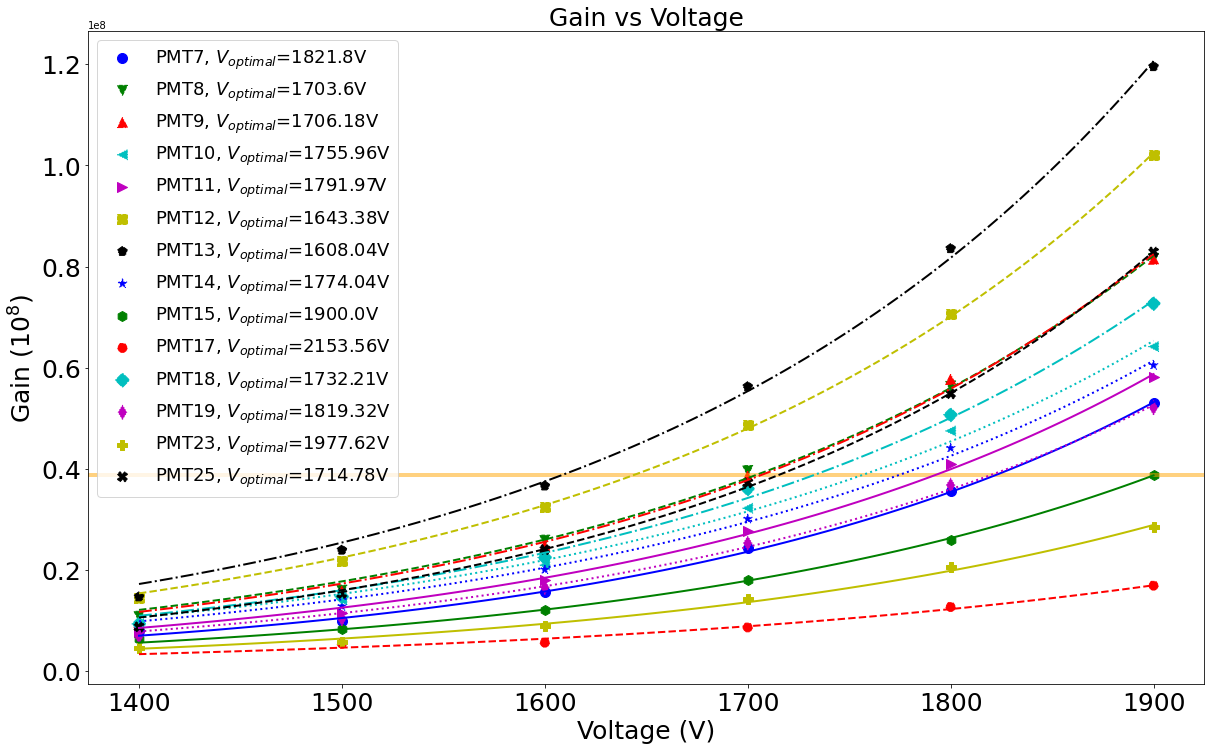

In [46]:
def exponential(x, a, b):
        return a* np.exp (b*np.array(x))

# popt, pcov = curve_fit(exponential, voltage_use, Gain_value, maxfev=100000, bounds=([1000, 0], [np.inf, 0.01]))
#fit the gain with exponential function for all PMTs
popt = []
pcov = []
marker_list = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
#insert a 0 in the first element of the gain for PMT 1117
gain[PMT_number.index(17)].insert(0, 0)
for i in range(len(gain)):
        popt_pmt, pcov_pmt = curve_fit(exponential, Voltage[1:], gain[i][1:], maxfev=100000, bounds=([1000, 0], [np.inf, 0.01]))
   
        popt.append(popt_pmt)
        pcov.append(pcov_pmt)

#plot the gain with exponential fit
xrange = np.linspace(1400, 1900, 100)
#draw a horizontal line at gain=exponential(1900, *popt[PMT_number.index(1115)]), calculate intersection with each gain fit plots and print in the legend
plt.figure(figsize=(20,12))
Gain_value_max = exponential(1900, *popt[PMT_number.index(15)])
plt.axhline(y=Gain_value_max, color='orange', linestyle='-', alpha = 0.5,linewidth=4)
for i in range(len(gain)):
    if PMT_number[i] == 17:
        plt.scatter(Voltage[1:], gain[i][1:], label='PMT'+str(PMT_number[i])+', $V_{optimal}$='+str(round(np.log(Gain_value_max/popt[i][0])/popt[i][1],2))+'V', color=color_list[i], linestyle=line_list[i], marker=marker_list[i], s=100)
    else:
        plt.scatter(Voltage, gain[i], label='PMT'+str(PMT_number[i])+', $V_{optimal}$='+str(round(np.log(Gain_value_max/popt[i][0])/popt[i][1],2))+'V', color=color_list[i], linestyle=line_list[i], marker=marker_list[i], s=100)
    plt.plot(xrange, exponential(xrange, *popt[i]), color=color_list[i], linestyle=line_list[i], linewidth=2)

plt.xlabel('Voltage (V)', fontsize=25)
plt.ylabel('Gain ($10^8$)', fontsize=25)
plt.title('Gain vs Voltage', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.yscale('log')
plt.legend(fontsize=18)
plt.show()


<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs Voltage')

([<matplotlib.axis.XTick at 0x7f4494aab780>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

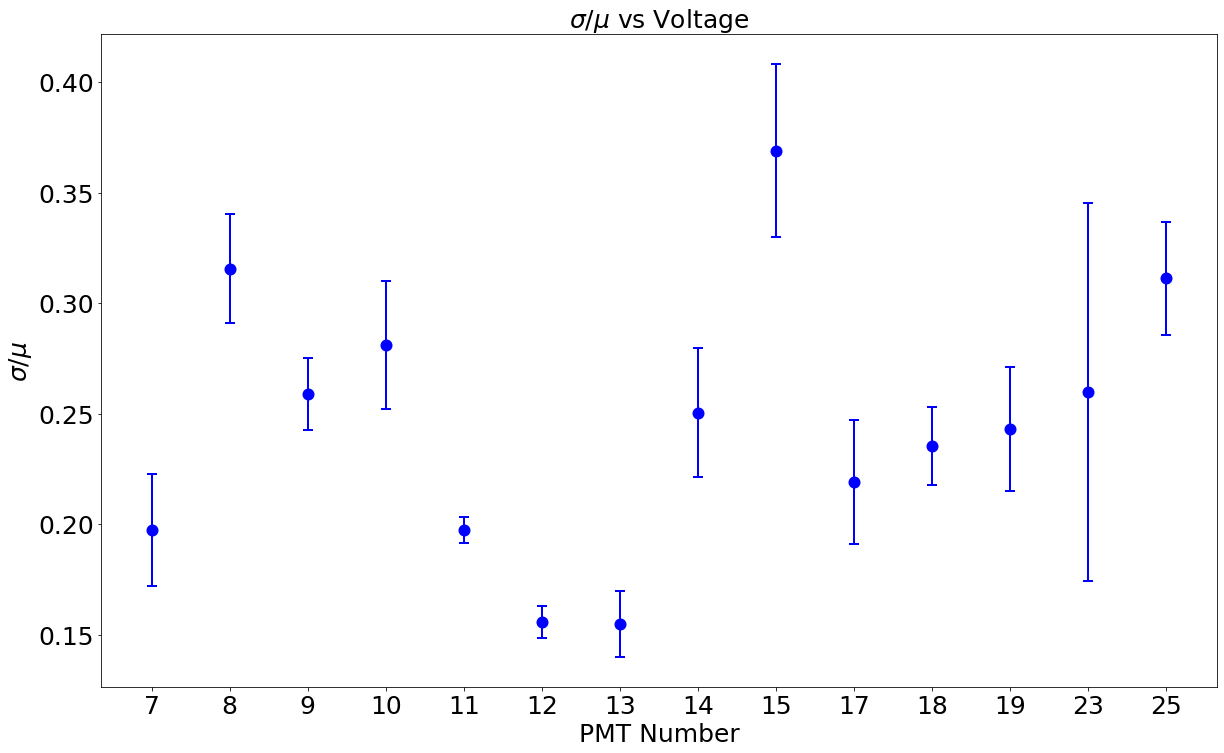

In [47]:
#plot the sigma_mu
sigma_mu = []
PMT_number = []
for i in range(len(Data_allPMT)):
    sigma_mu.append(Data_allPMT[i].sigma_mu)
    PMT_number.append(Data_allPMT[i].PMT_number)
#calculate the mean and std of sigma_mu
sigma_mu_mean = []
sigma_mu_std = []
for i in range(len(sigma_mu)):
    sigma_mu_mean.append(np.mean(sigma_mu[i]))
    sigma_mu_std.append(np.std(sigma_mu[i]))

x_pos = [i for i, _ in enumerate(PMT_number)]
plt.figure(figsize=(20,12))
plt.errorbar(x_pos, sigma_mu_mean, yerr=sigma_mu_std, fmt='o', label='PMT'+str(PMT_number[i]), capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color='b')
plt.xlabel('PMT Number', fontsize=25)
plt.ylabel('$\sigma/{\mu}$', fontsize=25)
plt.title('$\sigma/{\mu}$ vs Voltage', fontsize=25)
plt.xticks(x_pos, PMT_number, fontsize=25)
plt.yticks(fontsize=25)
plt.show()


[0, 0.2087407812677598, 0.26249066971249857, 0.23581353922680784, 0.20811020828047527, 0.17991724654024074]


<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number')

([<matplotlib.axis.XTick at 0x7f4494686cc0>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

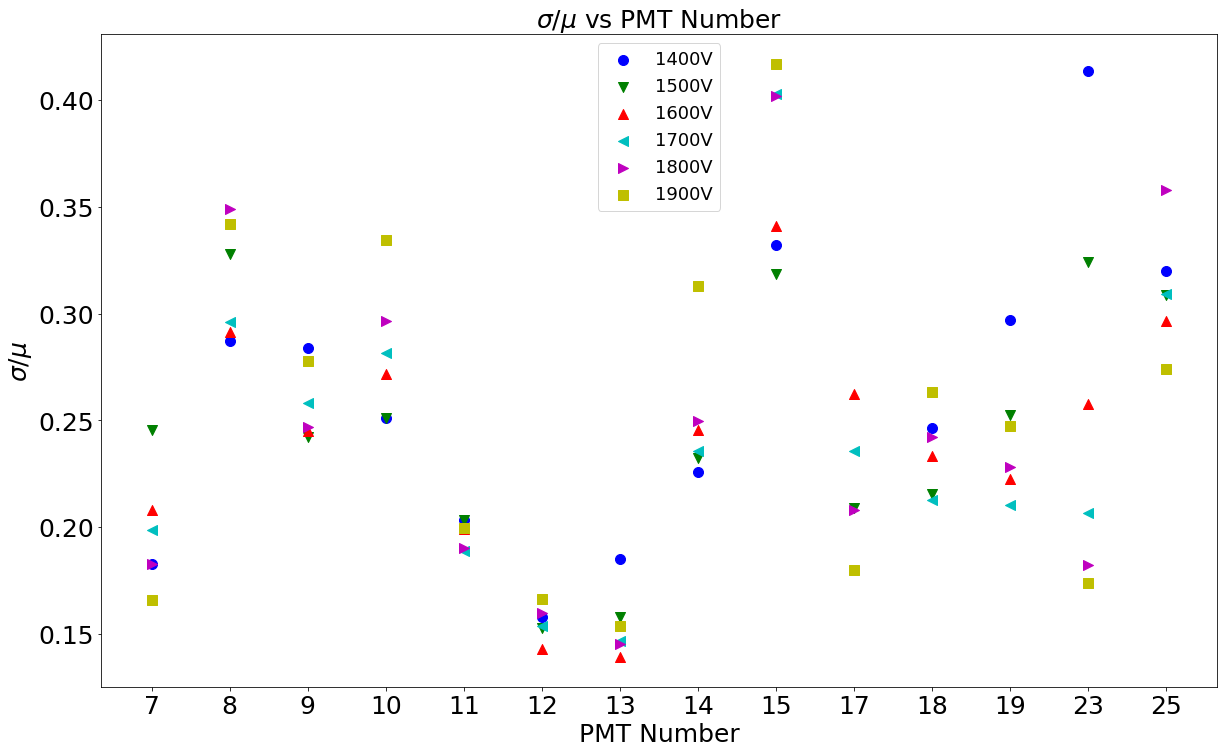

In [48]:
#plot the sigma_mu
sigma_mu = []
PMT_number = []
marker_list = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(Data_allPMT)):
    sigma_mu.append(Data_allPMT[i].sigma_mu)
    PMT_number.append(Data_allPMT[i].PMT_number)

#add a 0 at the begining to the sigma_mu list for PMT 1117
sigma_mu[PMT_number.index(17)].insert(0, 0)
print(sigma_mu[PMT_number.index(17)])
# sigma_mu[PMT_number==1117].insert(0, 0)
# print(sigma_mu[PMT_number==1117])

x_pos = [i for i, _ in enumerate(PMT_number)]
x_pos_wo1117 = [i for i, _ in enumerate(PMT_number) if PMT_number[i] != 17]
sigma_mu_wo1117 = [sigma_mu[i] for i in range(len(sigma_mu)) if PMT_number[i] != 17]

plt.figure(figsize=(20,12))
#plot the sigma_mu VS PMT_number, for each voltage use different color
#PMT 1117 is different, it doesn't has 1400V data
for i in range(len(Voltage)):
    if i == 0:
        # plt.errorbar(x_pos_wo1117, [sigma_mu_wo1117[j][i] for j in range(len(sigma_mu_wo1117))], fmt='o', label=str(Voltage[i])+'V', capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10)
        plt.scatter(x_pos_wo1117, [sigma_mu_wo1117[j][i] for j in range(len(sigma_mu_wo1117))], label=str(Voltage[i])+'V', color=color_list[i], marker=marker_list[i], s=100, )
    else:
        # plt.errorbar(x_pos, [sigma_mu[j][i] for j in range(len(sigma_mu))], fmt='o', label=str(Voltage[i])+'V', capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10)
        plt.scatter(x_pos, [sigma_mu[j][i] for j in range(len(sigma_mu))], label=str(Voltage[i])+'V', color=color_list[i], marker=marker_list[i], s=100)

plt.xlabel('PMT Number', fontsize=25)
plt.ylabel('$\sigma/{\mu}$', fontsize=25)
plt.title('$\sigma/{\mu}$ vs PMT Number', fontsize=25)
plt.xticks(x_pos, PMT_number, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=18)




0.36368468018901146

[0, 0, 0.2087407812677598, 0.26249066971249857, 0.23581353922680784, 0.20811020828047527, 0.17991724654024074]
[0, 0, 0.0813276690251777, 0.04158963535117431, 0.02440882192991935, 0.020971344997114998]


<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number')

([<matplotlib.axis.XTick at 0x7f44945c1320>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

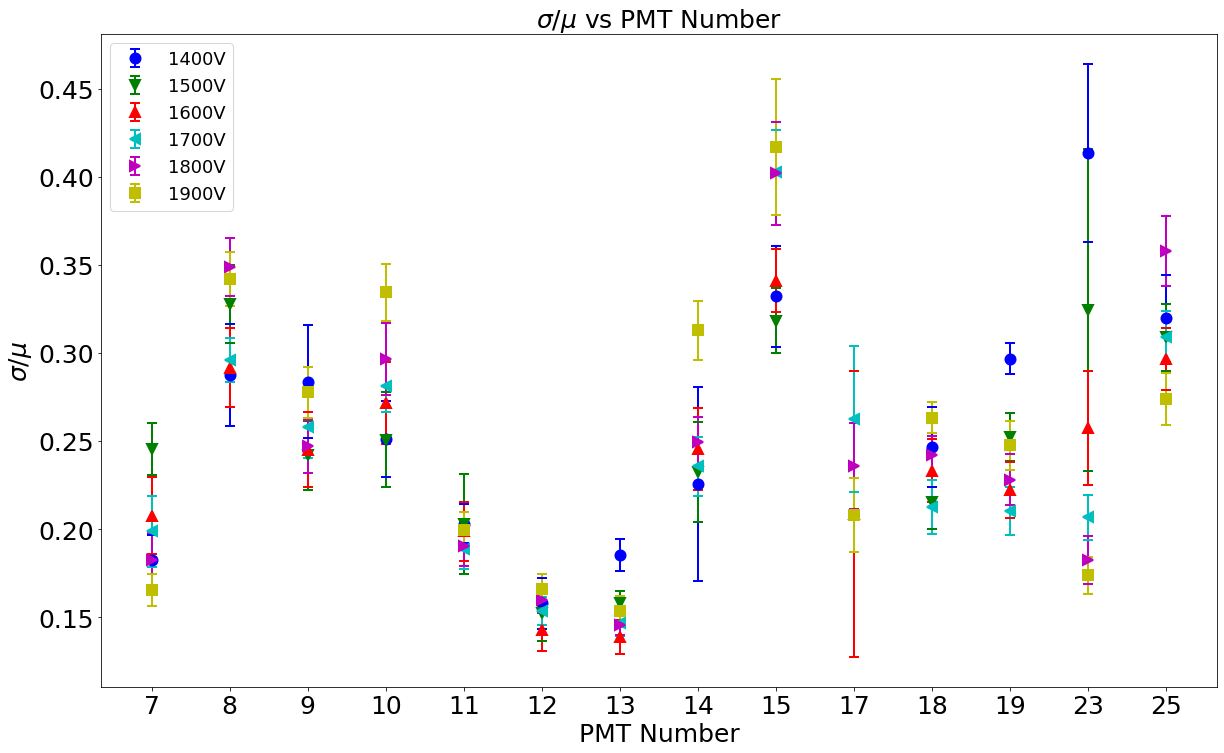

In [49]:
#plot the sigma_mu
sigma_mu = []
PMT_number = []
sigma_mu_err = []
marker_list = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(Data_allPMT)):
    
    sigma_mu.append(Data_allPMT[i].sigma_mu)
    sigma_mu_err.append(Data_allPMT[i].err_sigma_mu)
    PMT_number.append(Data_allPMT[i].PMT_number)

#add a 0 at the begining to the sigma_mu list for PMT 1117
sigma_mu[PMT_number.index(17)].insert(0, 0)
#add a 0 at the begining to the sigma_mu_err list for PMT 1117
sigma_mu_err[PMT_number.index(17)].pop(0)
sigma_mu_err[PMT_number.index(17)].insert(0, 0)
sigma_mu_err[PMT_number.index(17)].insert(0, 0)
print(sigma_mu[PMT_number.index(17)])
print(sigma_mu_err[PMT_number.index(17)])
# sigma_mu[PMT_number==1117].insert(0, 0)
# print(sigma_mu[PMT_number==1117])

x_pos = [i for i, _ in enumerate(PMT_number)]
x_pos_wo1117 = [i for i, _ in enumerate(PMT_number) if PMT_number[i] != 17]
sigma_mu_wo1117 = [sigma_mu[i] for i in range(len(sigma_mu)) if PMT_number[i] != 17]
sigma_mu_err_wo1117 = [sigma_mu_err[i] for i in range(len(sigma_mu_err)) if PMT_number[i] != 17]

plt.figure(figsize=(20,12))
#plot the sigma_mu VS PMT_number, for each voltage use different color
#PMT 1117 is different, it doesn't has 1400V data
for i in range(len(Voltage)):
    if i == 0 or i == 1:
        plt.errorbar(x_pos_wo1117, [sigma_mu_wo1117[j][i] for j in range(len(sigma_mu_wo1117))], yerr=[sigma_mu_err_wo1117[j][i] for j in range(len(sigma_mu_wo1117))], fmt='o', label=str(Voltage[i])+'V', capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color=color_list[i], marker=marker_list[i])
        # plt.scatter(x_pos_wo1117, [sigma_mu_wo1117[j][i] for j in range(len(sigma_mu_wo1117))], label=str(Voltage[i])+'V', color=color_list[i], marker=marker_list[i], s=100, )

    else:
        plt.errorbar(x_pos, [sigma_mu[j][i] for j in range(len(sigma_mu))], yerr=[sigma_mu_err[j][i] for j in range(len(sigma_mu))], fmt='o', label=str(Voltage[i])+'V', capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color=color_list[i], marker=marker_list[i])
        # plt.scatter(x_pos, [sigma_mu[j][i] for j in range(len(sigma_mu))], label=str(Voltage[i])+'V', color=color_list[i], marker=marker_list[i], s=100)


plt.xlabel('PMT Number', fontsize=25)
plt.ylabel('$\sigma/{\mu}$', fontsize=25)
plt.title('$\sigma/{\mu}$ vs PMT Number', fontsize=25)
plt.xticks(x_pos, PMT_number, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=18)

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1400V')

([<matplotlib.axis.XTick at 0x7f44945b27b8>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

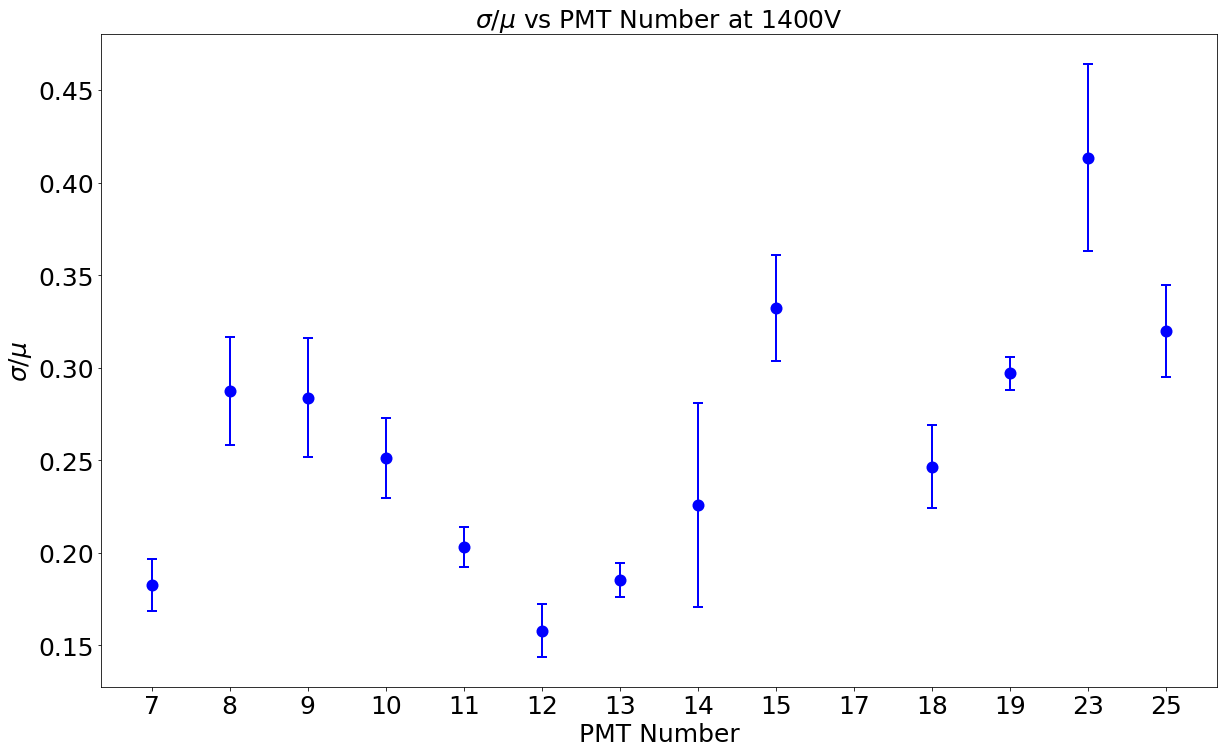

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1500V')

([<matplotlib.axis.XTick at 0x7f4494897cf8>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

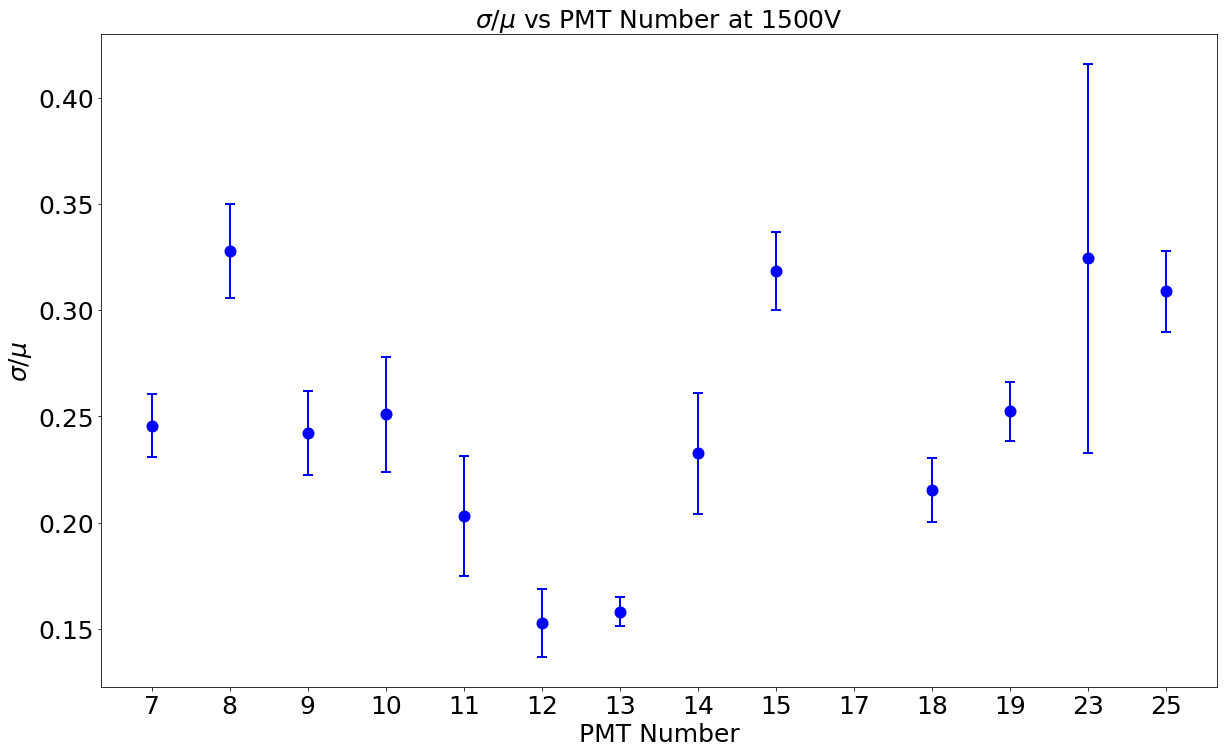

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1600V')

([<matplotlib.axis.XTick at 0x7f4494834518>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

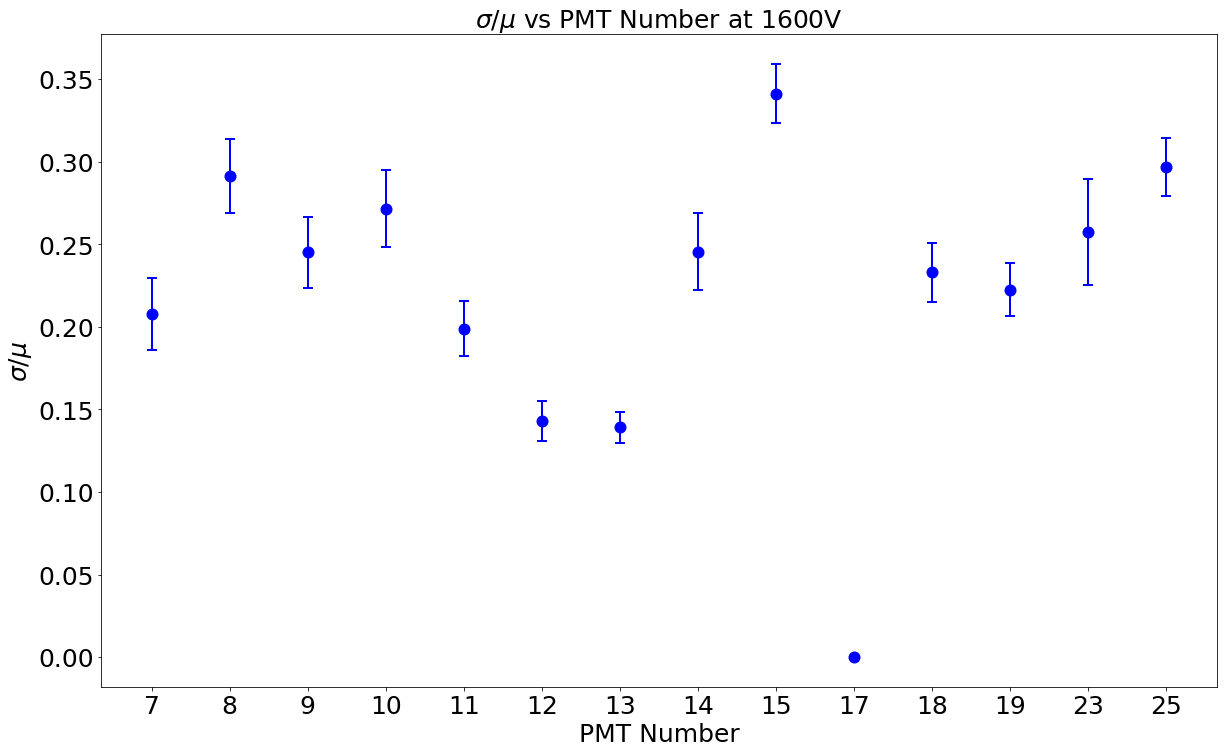

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1700V')

([<matplotlib.axis.XTick at 0x7f44947d8d30>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

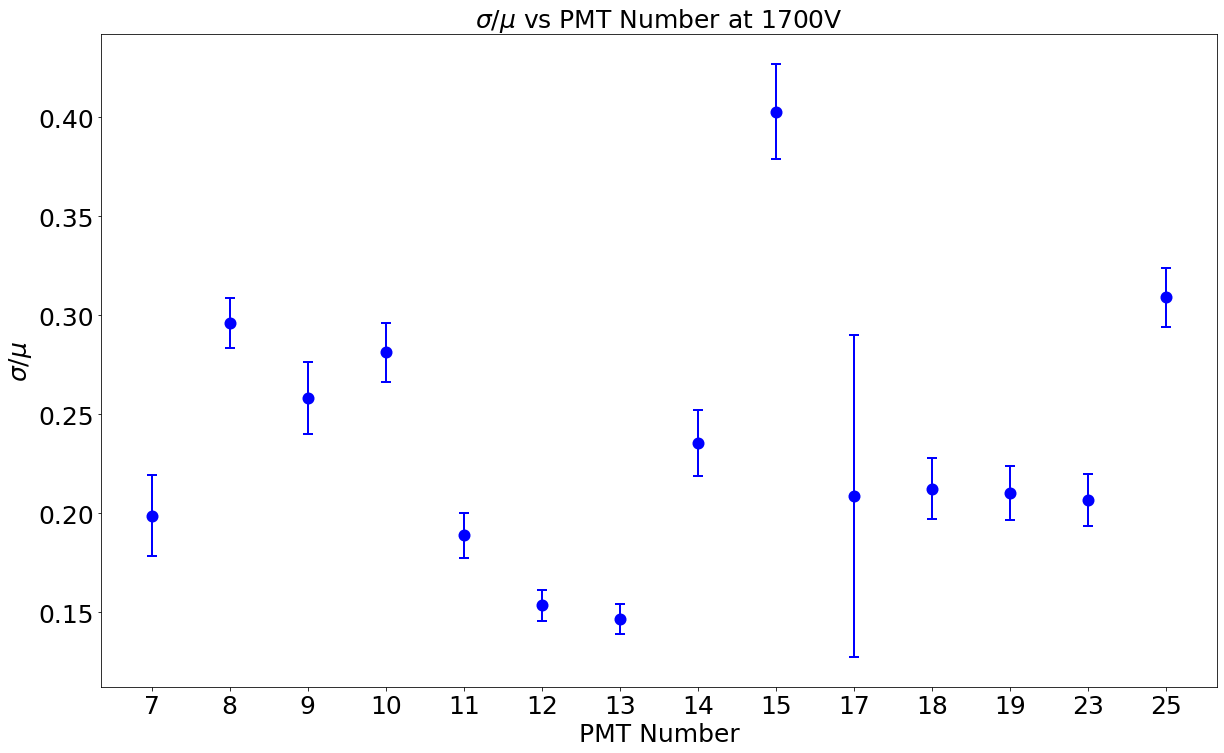

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1800V')

([<matplotlib.axis.XTick at 0x7f449448d518>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

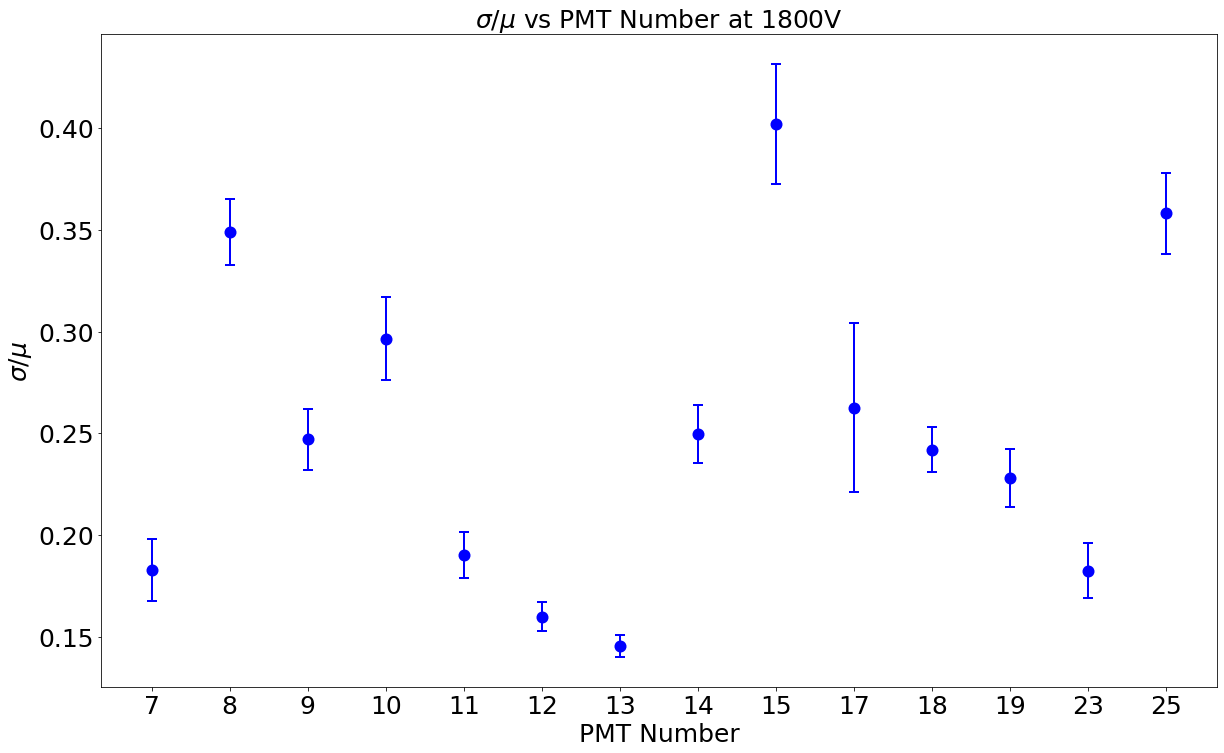

<Figure size 1440x864 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1900V')

([<matplotlib.axis.XTick at 0x7f449440b6a0>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

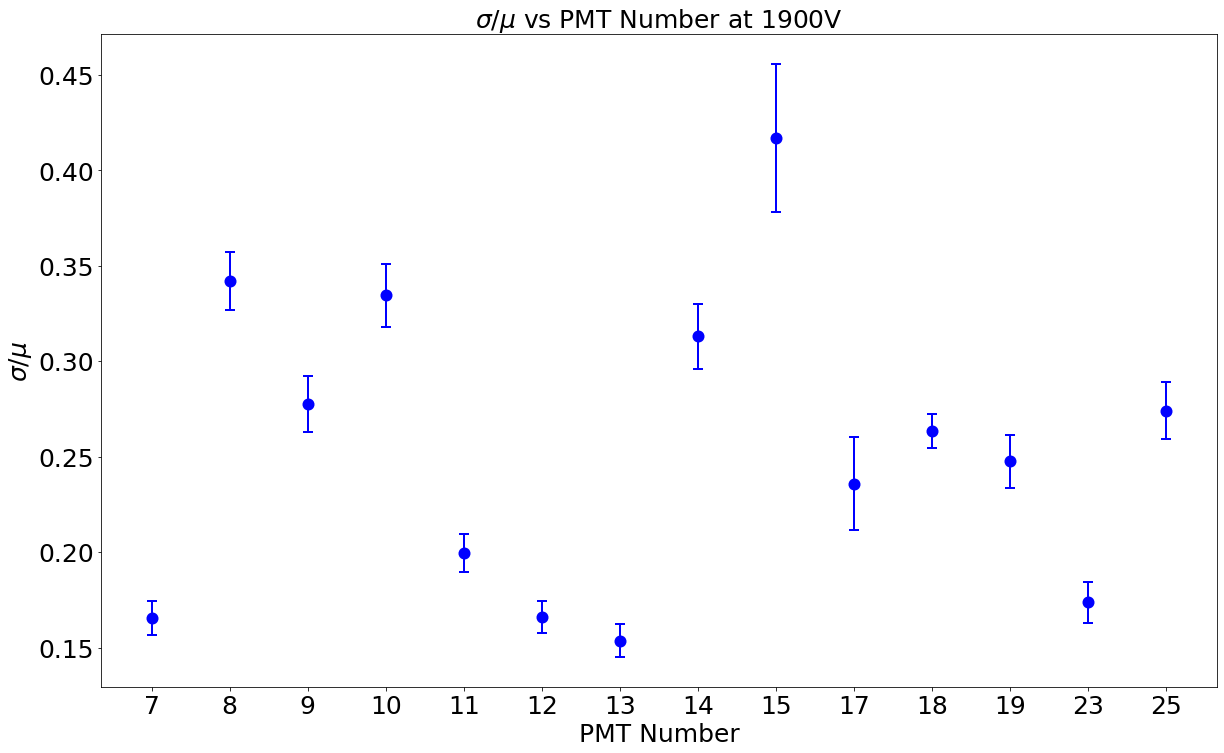

In [50]:
#plot the sigma_mu vs PMT_number, for each voltage, with error bar err_sigma_mu
for i in range(len(Voltage)):
    sigma_mu = []
    err_sigma_mu = []
    PMT_number = []
    if Voltage[i] == 1400 or Voltage[i] == 1500:
        for j in range(len(Data_allPMT)):
            if Data_allPMT[j].PMT_number == 17:
                sigma_mu.append(0)
                err_sigma_mu.append(0)
                PMT_number.append(Data_allPMT[j].PMT_number)
            else:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i])
                err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i])
                PMT_number.append(Data_allPMT[j].PMT_number)
        x_pos = [i for i, _ in enumerate(PMT_number)]
        #find the index of PMT_number 1117
        index_1117 = np.where(np.array(PMT_number) == 17)[0][0]
        x_pos_wo1117 = x_pos[:index_1117] + x_pos[index_1117+1:]
        sigma_mu_wo1117 = sigma_mu[:index_1117] + sigma_mu[index_1117+1:]
        err_sigma_mu_wo1117 = err_sigma_mu[:index_1117] + err_sigma_mu[index_1117+1:]
        plt.figure(figsize=(20,12))
        plt.errorbar(x_pos_wo1117, sigma_mu_wo1117, yerr=err_sigma_mu_wo1117, fmt='o', label='PMT'+str(PMT_number[i]), capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color='b')
        plt.xlabel('PMT Number', fontsize=25)
        plt.ylabel('$\sigma/{\mu}$', fontsize=25)
        plt.title('$\sigma/{\mu}$ vs PMT Number at ' + str(Voltage[i]) + 'V', fontsize=25)
        plt.xticks(x_pos, PMT_number, fontsize=25)
        plt.yticks(fontsize=25)
        plt.show()
    else:
        for j in range(len(Data_allPMT)):
            if Data_allPMT[j].PMT_number == 17:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i-1])
                err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i-1])
                PMT_number.append(Data_allPMT[j].PMT_number)
            else:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i])
                err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i])
                PMT_number.append(Data_allPMT[j].PMT_number)
        x_pos = [i for i, _ in enumerate(PMT_number)]
        plt.figure(figsize=(20,12))
        plt.errorbar(x_pos, sigma_mu, yerr=err_sigma_mu, fmt='o', label='PMT'+str(PMT_number[i]), capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color='b')
        plt.xlabel('PMT Number', fontsize=25)
        plt.ylabel('$\sigma/{\mu}$', fontsize=25)
        plt.title('$\sigma/{\mu}$ vs PMT Number at ' + str(Voltage[i]) + 'V', fontsize=25)
        plt.xticks(x_pos, PMT_number, fontsize=25)
        plt.yticks(fontsize=25)
        plt.show()


<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1400V')

([<matplotlib.axis.XTick at 0x7f4494372940>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

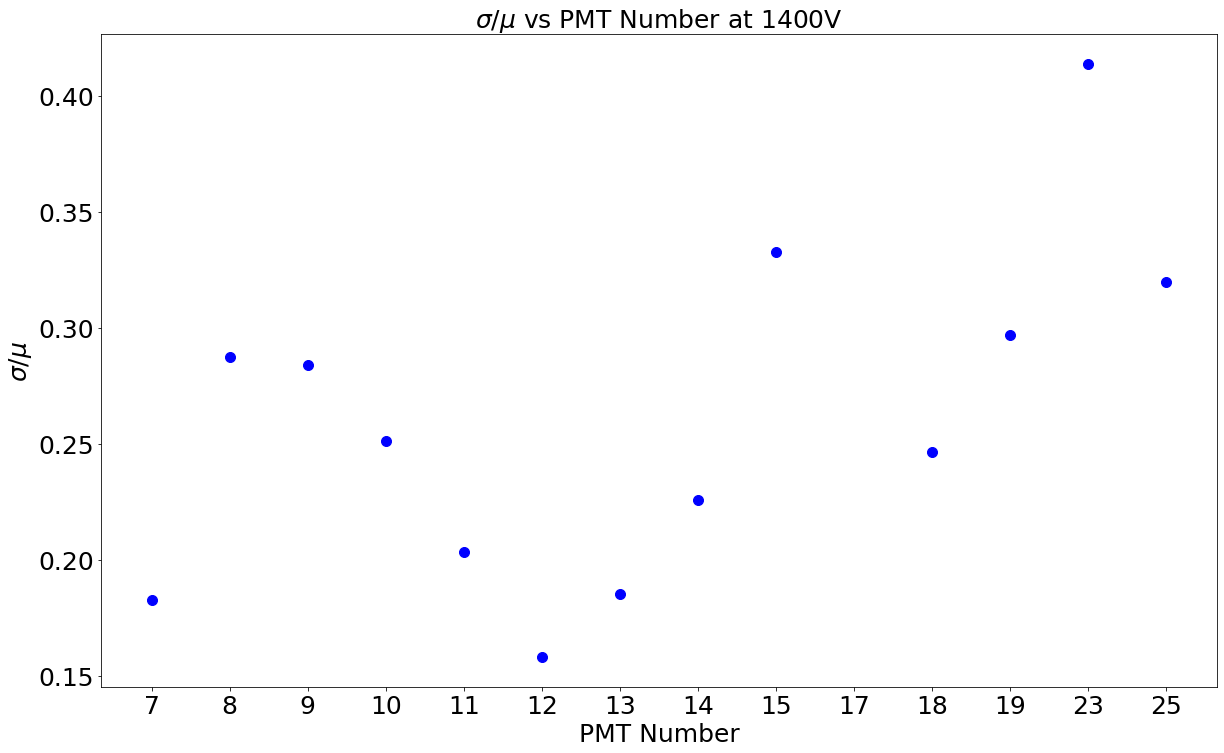

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1500V')

([<matplotlib.axis.XTick at 0x7f44942bf2e8>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

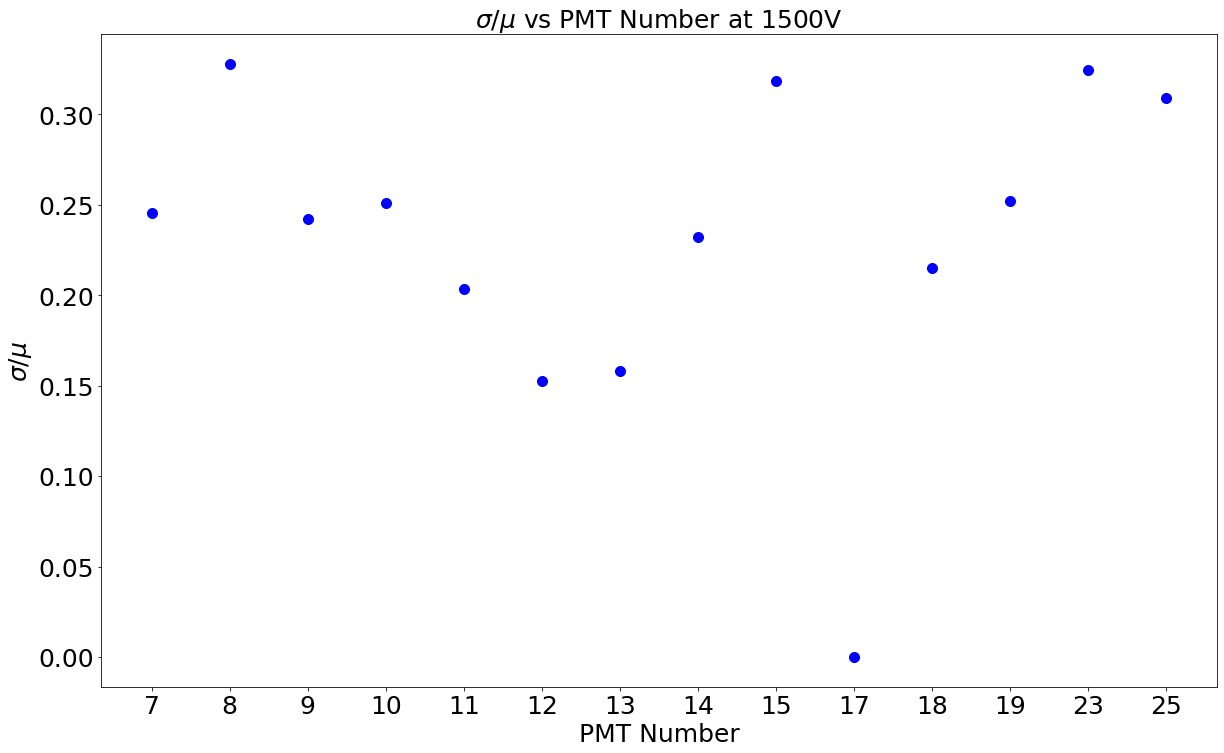

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1600V')

([<matplotlib.axis.XTick at 0x7f44942882e8>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

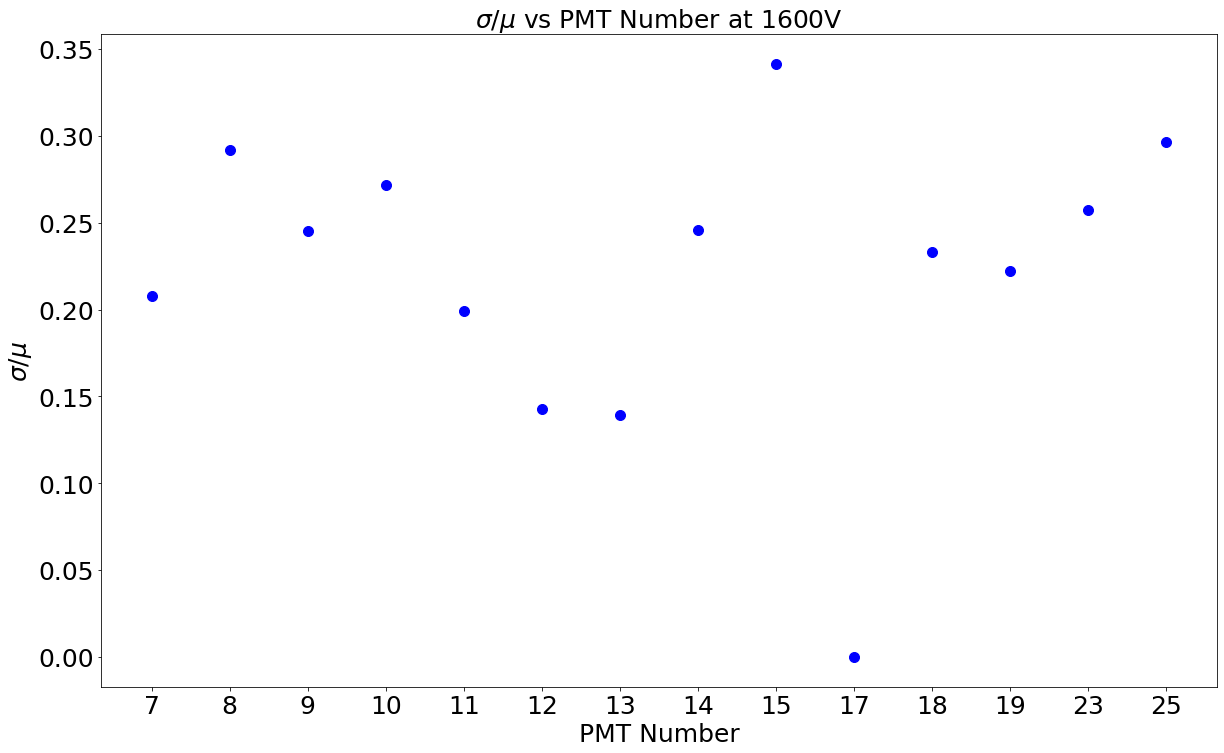

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1700V')

([<matplotlib.axis.XTick at 0x7f44942147f0>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

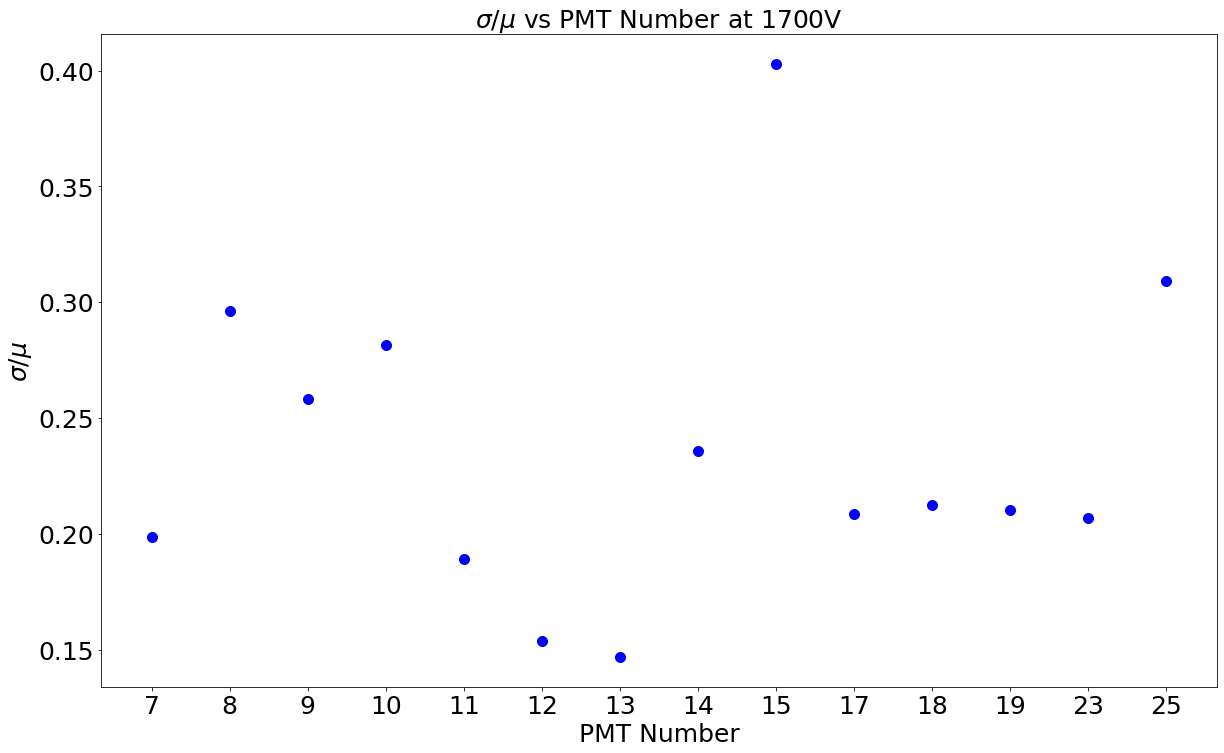

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1800V')

([<matplotlib.axis.XTick at 0x7f449411a208>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

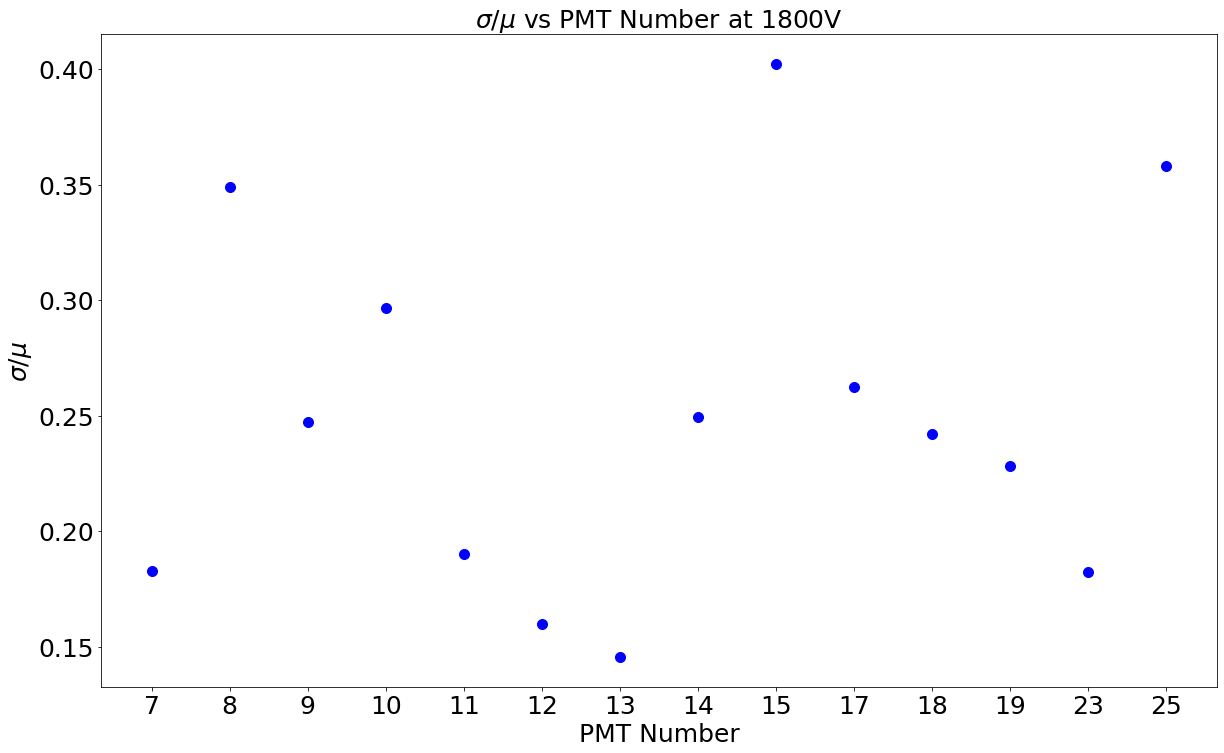

<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'PMT Number')

Text(0, 0.5, '$\\sigma/{\\mu}$')

Text(0.5, 1.0, '$\\sigma/{\\mu}$ vs PMT Number at 1900V')

([<matplotlib.axis.XTick at 0x7f44940d5ba8>,
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '23'),
  Text(13, 0, '25')])

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

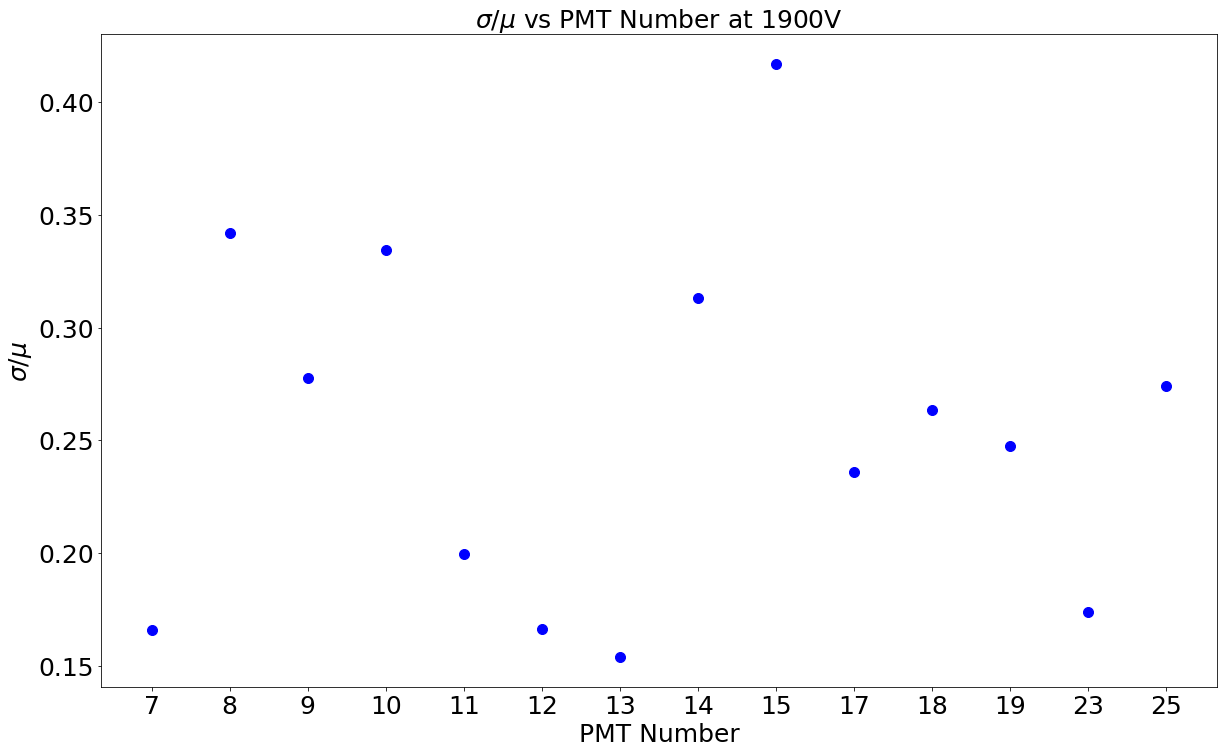

In [51]:
#plot the sigma_mu vs PMT_number, for each voltage, with error bar err_sigma_mu
for i in range(len(Voltage)):
    sigma_mu = []
    err_sigma_mu = []
    PMT_number = []
    if Voltage[i] == 1400:
        for j in range(len(Data_allPMT)):
            if Data_allPMT[j].PMT_number == 17:
                sigma_mu.append(0)
                # err_sigma_mu.append(0)
                PMT_number.append(Data_allPMT[j].PMT_number)
            else:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i])
                # err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i])
                PMT_number.append(Data_allPMT[j].PMT_number)
        x_pos = [i for i, _ in enumerate(PMT_number)]
        #find the index of PMT_number 1117
        index_1117 = np.where(np.array(PMT_number) == 17)[0][0]
        x_pos_wo1117 = x_pos[:index_1117] + x_pos[index_1117+1:]
        sigma_mu_wo1117 = sigma_mu[:index_1117] + sigma_mu[index_1117+1:]
        err_sigma_mu_wo1117 = err_sigma_mu[:index_1117] + err_sigma_mu[index_1117+1:]
        plt.figure(figsize=(20,12))
        # plt.errorbar(x_pos_wo1117, sigma_mu_wo1117, yerr=err_sigma_mu_wo1117, fmt='o', label='PMT'+str(PMT_number[i]), capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color='b')
        plt.plot(x_pos_wo1117, sigma_mu_wo1117, 'o', label='PMT'+str(PMT_number[i]), markersize=10, color='b')
        plt.xlabel('PMT Number', fontsize=25)
        plt.ylabel('$\sigma/{\mu}$', fontsize=25)
        plt.title('$\sigma/{\mu}$ vs PMT Number at ' + str(Voltage[i]) + 'V', fontsize=25)
        plt.xticks(x_pos, PMT_number, fontsize=25)
        plt.yticks(fontsize=25)
        plt.show()
    else:
        for j in range(len(Data_allPMT)):
            if Data_allPMT[j].PMT_number == 17:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i-1])
                # err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i-1])
                PMT_number.append(Data_allPMT[j].PMT_number)
            else:
                sigma_mu.append(Data_allPMT[j].sigma_mu[i])
                # err_sigma_mu.append(Data_allPMT[j].err_sigma_mu[i])
                PMT_number.append(Data_allPMT[j].PMT_number)
        x_pos = [i for i, _ in enumerate(PMT_number)]
        plt.figure(figsize=(20,12))
        # plt.errorbar(x_pos, sigma_mu, yerr=err_sigma_mu, fmt='o', label='PMT'+str(PMT_number[i]), capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, markersize=10, color='b')
        plt.plot(x_pos, sigma_mu, 'o', label='PMT'+str(PMT_number[i]), markersize=10, color='b')
        plt.xlabel('PMT Number', fontsize=25)
        plt.ylabel('$\sigma/{\mu}$', fontsize=25)
        plt.title('$\sigma/{\mu}$ vs PMT Number at ' + str(Voltage[i]) + 'V', fontsize=25)
        plt.xticks(x_pos, PMT_number, fontsize=25)
        plt.yticks(fontsize=25)
        plt.show()
